In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
# -------------
# Get MRI data (256,256,256,7)
# ["PDw_au","syFLAIR","syFSE","syGRE","syMP2RAGE","T1","T2"]
# -------------
MRI = np.load("../AHIResearch/Rotated_MRI_cube.npy")

In [3]:
MRI.shape

(256, 256, 256, 7)

In [4]:
# single slice calculation 
slice_0 = MRI[:,:,0,:]
n0,n1,n2 = slice_0.shape
slice_0 = np.reshape(slice_0, (n0*n1*n2))
slice_0.shape

(458752,)

In [5]:
# 256 slices each of size 458752, appended into a list
X = []
for z in range(256):
    slice_z = MRI[:, :, z, :]
    n0,n1,n2 = slice_z.shape
    slice_z = np.reshape(slice_z, (n0*n1*n2))
    X.append(slice_z)
len(X)

256

In [6]:
# convert list to array shape (256, 458752)
X = np.asarray(X)
X.shape

(256, 458752)

2 Component Analysis

In [7]:
pca = PCA(n_components=2)

In [8]:
pX = pca.fit_transform(X)

In [9]:
print("Original shape: ", X.shape)
print("Transformed shape: ", pX.shape)

Original shape:  (256, 458752)
Transformed shape:  (256, 2)


In [10]:
df_pca = pd.DataFrame(pX, columns = ['Component 1', 'Component 2'])
df_pca

,Component 1,Component 2
0,154758.004216,24727.653789
1,143228.382075,21895.471398
2,139746.080737,27702.753945
3,137774.998991,40776.300567
4,131886.307189,50019.629019
5,123492.338676,58279.350303
6,113975.220655,64577.813634
7,106195.225433,69145.306037
8,101582.325054,72473.650014
9,100438.910723,76739.173672


Text(0, 0.5, 'Component 2')

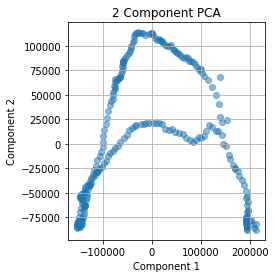

In [11]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.scatter(pX[:, 0], pX[:, 1], alpha=0.5)
plt.title("2 Component PCA") 
plt.grid()
plt.xlabel ('Component 1') 
plt.ylabel ('Component 2')

In [12]:
# Only retains 11.2% variance with 2 components
print(np.sum(pca.explained_variance_ratio_))

0.11238561778777098


In [13]:
pca_inv = pca.inverse_transform(pX)
X_trans = np.reshape(pca_inv,(256, 256, 256, 7))
X_trans.shape

(256, 256, 256, 7)

In [14]:
# side by side comparison of original images and reconstructed
def display_slice(z):
    
    #original
    plt.figure(figsize=(16,12))
    for i in range(7):
        plt.subplot(3,4,i+1)
        image = abs(MRI[:,:,z,i])
        plt.imshow(image,cmap="gray")
        plt.axis('off')
    plt.tight_layout()  
    plt.suptitle('Original', y=1, size=20)
    
    #reconstruct images using reduced dataset
    plt.figure(figsize=(16,12))
    for i in range(7):
        plt.subplot(3,4,i+1)        
        image = abs(X_trans[:,:,z,i])
        plt.imshow(image,cmap="gray")
        plt.axis('off')
    plt.tight_layout()
    plt.suptitle('Reconstructed', y=1, size=20)
    
   
interact(display_slice, z=(0, 255))

interactive(children=(IntSlider(value=127, description='z', max=255), Output()), _dom_classes=('widget-interac…

<function __main__.display_slice(z)>

Testing 4 Component Analysis

In [15]:
pca4 = PCA(n_components=4)

In [16]:
p4X = pca4.fit_transform(X)

In [17]:
print("Original shape: ", X.shape)
print("Transformed shape: ", p4X.shape)

Original shape:  (256, 458752)
Transformed shape:  (256, 4)


In [18]:
df_pca4 = pd.DataFrame(p4X, columns = ['Component 1', 'Component 2', 'Component 3', 'Component 4'])
df_pca4

,Component 1,Component 2,Component 3,Component 4
0,154758.005859,24739.002722,21787.023649,117699.049150
1,143228.384024,21906.485298,27418.859321,124309.361285
2,139746.082508,27711.576390,29154.137661,118937.424810
3,137775.000746,40782.907798,33559.294909,106315.542519
4,131886.308605,50024.531685,36791.220073,98646.235727
5,123492.339632,58282.241472,39986.073984,92014.650149
6,113975.221305,64578.969183,40089.494090,84788.935451
7,106195.225742,69144.696565,35849.799433,78241.969889
8,101582.325029,72471.316674,33552.042131,75008.652131
9,100438.910237,76734.152356,33259.058249,73852.131721


In [19]:
# Only retains 14.9% variance with 4 components
print(np.sum(pca4.explained_variance_ratio_))

0.14944202839150722


In [20]:
pca4_inv = pca4.inverse_transform(p4X)
X4_trans = np.reshape(pca4_inv,(256, 256, 256, 7))
X4_trans.shape

(256, 256, 256, 7)

In [21]:
# side by side comparison of original images and reconstructed
def display_slice(z):
    
    #original
    plt.figure(figsize=(16,12))
    for i in range(7):
        plt.subplot(3,4,i+1)
        image = abs(MRI[:,:,z,i])
        plt.imshow(image,cmap="gray")
        plt.axis('off')
    plt.tight_layout()  
    plt.suptitle('Original', y=1, size=20)
    
    #reconstruct images using reduced dataset
    plt.figure(figsize=(16,12))
    for i in range(7):
        plt.subplot(3,4,i+1)        
        image = abs(X4_trans[:,:,z,i])
        plt.imshow(image,cmap="gray")
        plt.axis('off')
    plt.tight_layout()    
    plt.suptitle('Reconstructed', y=1, size=20)
    
   
interact(display_slice, z=(0, 255))

interactive(children=(IntSlider(value=127, description='z', max=255), Output()), _dom_classes=('widget-interac…

<function __main__.display_slice(z)>

How many components are needed to retain 65% variance?

In [22]:
pca_n = PCA(0.65)

In [23]:
pnX = pca_n.fit_transform(X)

In [24]:
print("Original shape: ", X.shape)
print("Transformed shape: ", pnX.shape)

Original shape:  (256, 458752)
Transformed shape:  (256, 91)


In [25]:
print(np.sum(pca_n.explained_variance_ratio_))

0.6502583462017033


In [26]:
pca91_inv = pca_n.inverse_transform(pnX)
X91_trans = np.reshape(pca91_inv,(256, 256, 256, 7))
X91_trans.shape

(256, 256, 256, 7)

In [27]:
# side by side comparison of original images and reconstructed
def display_slice(z):
    
    #original
    plt.figure(figsize=(16,12))
    for i in range(7):
        plt.subplot(3,4,i+1)
        image = abs(MRI[:,:,z,i])
        plt.imshow(image,cmap="gray")
        plt.axis('off')
    plt.tight_layout()  
    plt.suptitle('Original', y=1, size=20)
    
    #reconstruct images using reduced dataset
    plt.figure(figsize=(16,12))
    for i in range(7):
        plt.subplot(3,4,i+1)        
        image = abs(X91_trans[:,:,z,i])
        plt.imshow(image,cmap="gray")
        plt.axis('off')
    plt.tight_layout()  
    plt.suptitle('Reconstructed', y=1, size=20)
    
   
interact(display_slice, z=(0, 255))

interactive(children=(IntSlider(value=127, description='z', max=255), Output()), _dom_classes=('widget-interac…

<function __main__.display_slice(z)>

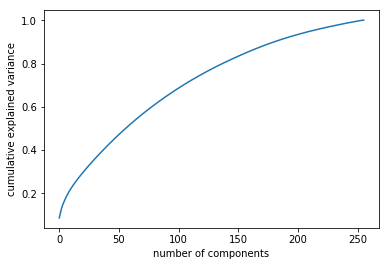

In [28]:
pca_vis = PCA().fit(X)
plt.plot(np.cumsum(pca_vis.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');